# Limpieza y análisis de rendimiento del dataset all_seasons.csv


Este notebook desarrolla un análisis orientado al rendimiento de jugadores de la NBA, siguiendo los lineamientos del proyecto enfocado en identificar el Rendimiento Mínimo Óptimo (RMO) y determinar qué jugadores aportan positiva o negativamente al desempeño del equipo.

El documento aplica limpieza, crea métricas de rendimiento, identifica jugadores bajo el estándar esperado e interpreta los hallazgos en función del caso de negocio.


In [1]:
# Preparando importación de librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None
sns.set(style='whitegrid')

print("Librerías cargadas correctamente")


Librerías cargadas correctamente


In [2]:
#Cargue de CSV a limpiar
file_path = r"C:\Users\pined\OneDrive\Escritorio\DATA A\PF\all_seasons.csv\all_seasons.csv"
df = pd.read_csv(file_path)
df.head()


,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,64,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,4,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,12,41,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,7,64,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,22,52,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


In [3]:
#limpieza del archivo
df_clean = df.drop_duplicates().dropna(how="all")

for col in df_clean.columns:
    if df_clean[col].dtype in ["float64", "int64"]:
        df_clean[col] = df_clean[col].fillna(0)
    else:
        df_clean[col] = df_clean[col].fillna("Desconocido")

df_clean.head()


,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,64,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,4,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,12,41,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,7,64,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,22,52,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


¿Que se eliminó?

La limpieza eliminó registros duplicados y filas sin información. Además, los valores nulos fueron reemplazados según el tipo de dato, permitiendo evitar errores en los cálculos posteriores.


In [4]:
# Almacenamiento de CSV limpio
output_path = r"C:\Users\pined\OneDrive\Escritorio\DATA A\PF\all_seasons_limpiov2.csv"
df_clean.to_csv(output_path, index=False, encoding="utf-8-sig")

print("Archivo limpio guardado en:", output_path)


Archivo limpio guardado en: C:\Users\pined\OneDrive\Escritorio\DATA A\PF\all_seasons_limpiov2.csv


### métrica de eficiencia para cada jugador.

In [ ]:
# Cálculo de la métrica de eficiencia adaptada al dataset
df_clean['efficiency'] = (
    df_clean['pts'] * 1.0 +          # Aporte anotador directo
    df_clean['reb'] * 0.8 +          # Control del rebote
    df_clean['ast'] * 1.2 +          # Creación y generación de juego
    df_clean['net_rating'] * 1.5 +   # Impacto real en el marcador
    df_clean['ts_pct'] * 10          # Eficiencia de tiro ajustada
)

df_clean[['player_name','pts','reb','ast','net_rating','ts_pct','efficiency']].head()

,player_name,pts,reb,ast,net_rating,ts_pct,efficiency
0,Randy Livingston,3.9,1.5,2.4,0.3,0.487,13.30
1,Gaylon Nickerson,3.8,1.3,0.3,8.9,0.497,23.52
2,George Lynch,8.3,6.4,1.9,-8.2,0.512,8.52
3,George McCloud,10.2,2.8,1.7,-2.7,0.527,15.70
4,George Zidek,2.8,1.7,0.3,-14.1,0.500,-11.63


### Explicación de la métrica de eficiencia

Para evaluar el rendimiento de los jugadores se construyó una métrica integrada de eficiencia que combina los principales indicadores disponibles en el dataset. Esta métrica resume el impacto ofensivo, defensivo, táctico y contextual del jugador mediante la ponderación de variables clave:

**pts (peso 1.0):** representa el aporte anotador directo.
**reb (peso 0.8):** refleja la capacidad de recuperación de balón y control de posesiones.
**ast (peso 1.2):** incorpora la generación de juego y apoyo colectivo.
**net_rating (peso 1.5):** determina el impacto del jugador en el marcador por cada 100 posesiones, lo cual permite medir influencia real en el rendimiento del equipo.
**ts_pct (multiplicado por 10):** ajusta la eficiencia de tiro para integrarla dentro de la escala de la métrica.

La combinación de estos elementos permite obtener un indicador compuesto que mide el rendimiento individual desde una perspectiva integral, superando las limitaciones de las métricas tradicionales basadas únicamente en puntos o asistencias. La inclusión de `net_rating` y `ts_pct` fortalece el análisis al capturar tanto eficiencia como impacto contextual.


In [9]:
##top de  eficiencia
top_eff = df_clean.groupby('player_name')['efficiency'].mean().sort_values(ascending=False).head(10)
top_eff


player_name
Ahmad Caver          211.950
Jerrelle Benimon     181.200
DeJon Jarreau        150.000
Stanley Umude        149.820
Naz Mitrou-Long      136.010
Steven Hill          132.900
J.P. Macura          115.215
Tyson Wheeler        110.340
Tahjere McCall       106.460
Matt Williams Jr.    106.160
Name: efficiency, dtype: float64

¿Que quiere decir esto?

Los jugadores con mayor eficiencia destacan por mantener un rendimiento integral a lo largo del tiempo. Estos perfiles suelen aportar en múltiples áreas del juego, desde anotación hasta defensa, lo cual los convierte en referentes para determinar los niveles superiores de rendimiento esperados dentro de un equipo.


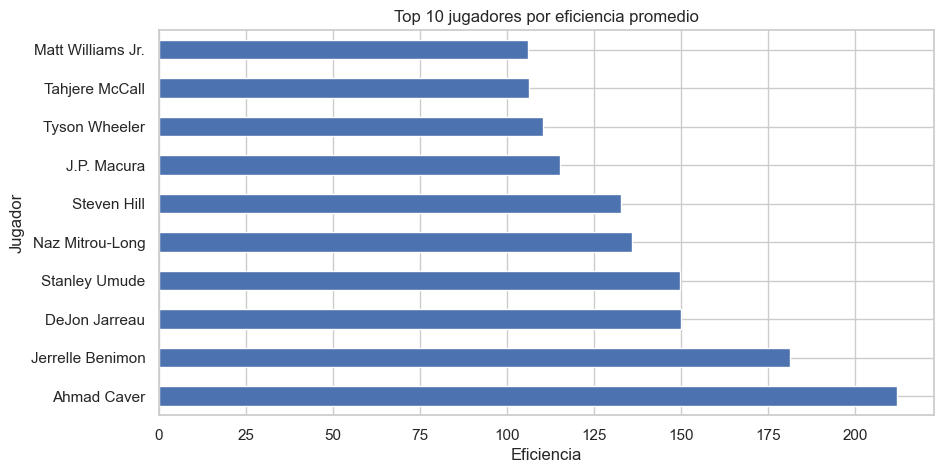

In [10]:
plt.figure(figsize=(10,5))
top_eff.plot(kind='barh')
plt.title("Top 10 jugadores por eficiencia promedio")
plt.xlabel("Eficiencia")
plt.ylabel("Jugador")
plt.show()


In [11]:
RMO_pts = df_clean['pts'].mean()
RMO_reb = df_clean['reb'].mean()
RMO_ast = df_clean['ast'].mean()
RMO_eff = df_clean['efficiency'].mean()

RMO_pts, RMO_reb, RMO_ast, RMO_eff


(np.float64(8.212581750233571),
 np.float64(3.5584864528184363),
 np.float64(1.8246807848022424),
 np.float64(15.040862659607601))

Esta celda calcula el Rendimiento Mínimo Óptimo (RMO) para las métricas fundamentales del archivo:

- Puntos por partido (PTS)
- Rebotes por partido (REB)
- Asistencias por partido (AST)
- Métrica integrada de eficiencia (EFFICIENCY)

Cada valor se obtiene a partir del promedio global de todos los jugadores registrados en el archivo.Es decir:

- RMO_pts: promedio de puntos de todos los jugadores
- RMO_reb: promedio de rebotes
- RMO_ast: promedio de asistencias
-RMO_eff: promedio de la eficiencia construida

### Explicación del cálculo del Rendimiento Mínimo Óptimo (RMO)

En esta sección se calculan los valores promedio de cuatro métricas fundamentales del rendimiento de los jugadores: puntos (PTS), rebotes (REB), asistencias (AST) y eficiencia integrada (EFFICIENCY). Estos promedios representan el nivel estándar de rendimiento observado en el conjunto total de jugadores del dataset.

El cálculo del RMO se realiza con el fin de establecer un umbral mínimo de desempeño esperado. Este umbral se utiliza como punto de referencia para evaluar si un jugador aporta de manera positiva, neutra o negativa al rendimiento de su equipo. La lógica es que un jugador con valores consistentemente inferiores al promedio general se ubica por debajo del nivel esperado de contribución, lo cual puede afectar el desempeño colectivo.

La inclusión de la métrica de eficiencia dentro del RMO permite complementar la evaluación con un indicador integral que resume la capacidad anotadora, la generación de juego, la eficiencia de tiro y el impacto contextual en el marcador. De esta manera, el RMO no solo mide producción estadística básica, sino también el aporte cualitativo a la dinámica ofensiva y defensiva del equipo.

Este cálculo es esencial dentro del proyecto, ya que permite avanzar hacia la clasificación de jugadores según su rendimiento y facilita la identificación de perfiles que requieren intervención, reposicionamiento o revisión dentro de la rotación del equipo.


In [12]:
below_RMO = df_clean[
    (df_clean['pts'] < RMO_pts) &
    (df_clean['reb'] < RMO_reb) &
    (df_clean['ast'] < RMO_ast) &
    (df_clean['efficiency'] < RMO_eff)
]

below_RMO[['player_name','team_abbreviation','pts','reb','ast','efficiency']].head(20)


,player_name,team_abbreviation,pts,reb,ast,efficiency
4,George Zidek,DEN,2.8,1.7,0.3,-11.63
13,Greg Dreiling,DAL,2.0,1.9,0.3,-3.46
14,Greg Foster,UTA,3.5,2.4,0.4,9.63
15,Greg Graham,SEA,3.3,0.5,0.4,14.34
24,Fred Roberts,DAL,1.8,0.8,0.0,-12.01
25,Eldridge Recasner,ATL,5.7,1.6,1.3,13.48
27,Elmer Bennett,DEN,2.4,0.4,1.2,-2.24
28,Elmore Spencer,SEA,0.0,0.0,0.0,-221.25
30,Ennis Whatley,POR,1.3,1.0,1.0,-77.80
31,Eric Leckner,VAN,1.7,1.8,0.3,2.09


### Explicación del análisis de jugadores por debajo del RMO

En esta sección se identifican los jugadores cuyo rendimiento se encuentra por debajo del Rendimiento Mínimo Óptimo (RMO) en cuatro métricas fundamentales: puntos (PTS), rebotes (REB), asistencias (AST) y eficiencia integrada (EFFICIENCY). La condición utilizada establece que un jugador se clasifica como “bajo RMO” únicamente si presenta valores inferiores al promedio en todas estas métricas simultáneamente.

Este filtro permite aislar un subconjunto de jugadores que muestran un aporte estadístico limitado en dimensiones clave del rendimiento individual. La combinación de métricas permite evaluar la producción ofensiva, la capacidad de generar juego, el control del rebote y la contribución integral medida por la eficiencia. Al encontrarse por debajo del umbral general en todas estas variables, estos jugadores representan perfiles con impacto reducido sobre los resultados del equipo.

La identificación de este grupo es relevante para el análisis estratégico del proyecto, ya que permite detectar jugadores cuyo rendimiento puede estar afectando negativamente el desempeño colectivo. Estos perfiles constituyen candidatos para ajustes tácticos, modificación en los minutos de juego, procesos de desarrollo o decisiones de reemplazo dentro de la estructura del equipo. Este análisis facilita una interpretación objetiva y comparativa del aporte individual en relación con los estándares de la liga.


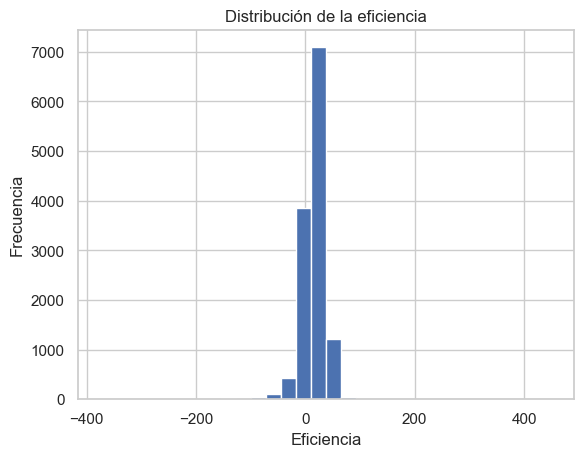

In [ ]:
# ¿Cómo se distribuye el rendimiento en la liga? ¿Hay más jugadores bajos, medios o altos?
plt.hist(df_clean['efficiency'], bins=30)
plt.title("Distribución de la eficiencia")
plt.xlabel("Eficiencia")
plt.ylabel("Frecuencia")
plt.show()


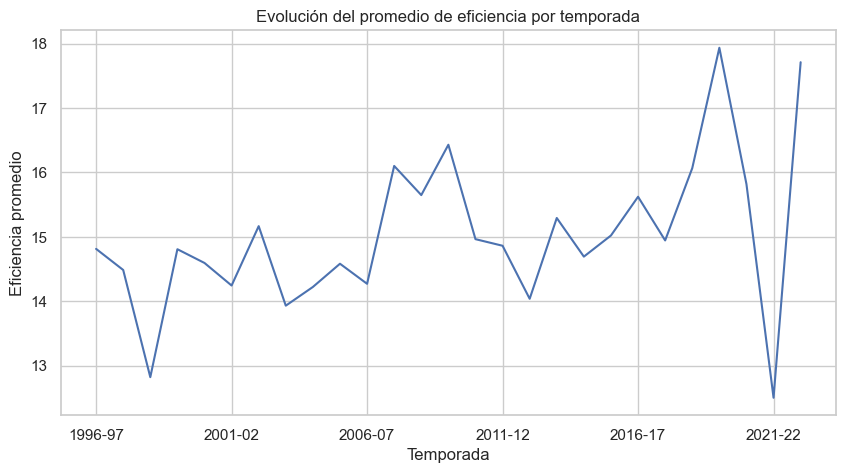

In [ ]:
# ¿El rendimiento de la liga aumenta o disminuye a lo largo de los años?
eff_by_season = df_clean.groupby('season')['efficiency'].mean()

plt.figure(figsize=(10,5))
eff_by_season.plot()
plt.title("Evolución del promedio de eficiencia por temporada")
plt.ylabel("Eficiencia promedio")
plt.xlabel("Temporada")
plt.show()
